In [10]:
## Q 1.b)

import numpy as np
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
from __future__ import division

%matplotlib notebook

def load_data():
    X = np.genfromtxt('logistic_x.txt')
    Y = np.genfromtxt('logistic_y.txt')
    return X, Y

def add_intercept(X_):
    m, n = X_.shape
    X = np.zeros((m, n + 1))
    
    Xo = np.ones(m)
    X = np.column_stack((Xo,X_))
    return X

X_, Y = load_data()
X = add_intercept(X_)

def calc_grad(X, Y, theta):
    m, n = X.shape
    grad = np.zeros(theta.shape)
    
    loop = np.arange(0, m, dtype=np.int16)

    for i in loop:
        x = X[i]
        y = Y[i]
        
        v = y*(np.dot((theta.T),x))
        func = 1.0/(1 + np.exp(-v))
        
        grad[0] = grad[0] - (1.0/m)*(x[0])*y*(1-func)
        grad[1] = grad[1] - (1.0/m)*(x[1])*y*(1-func)
        grad[2] = grad[2] - (1.0/m)*(x[2])*y*(1-func)
 
    return grad

def calc_hessian(X, Y, theta):
    m, n = X.shape
    H = np.zeros((n, n))

    loop = np.arange(0, m, dtype=np.int16)
    
    for i in loop:
        x = X[i]
        y = Y[i]
        
        v = y*(np.dot((theta.T),x))
        func = 1.0/(1 + np.exp(-v))
        
        H[0,0] = H[0,0] + (1.0/m)*(x[0])*(x[0])*func*(1-func)
        H[0,1] = H[0,1] + (1.0/m)*(x[0])*(x[1])*func*(1-func)
        H[0,2] = H[0,2] + (1.0/m)*(x[0])*(x[2])*func*(1-func)
        
        H[1,0] = H[1,0] + (1.0/m)*(x[1])*(x[0])*func*(1-func)
        H[1,1] = H[1,1] + (1.0/m)*(x[1])*(x[1])*func*(1-func)
        H[1,2] = H[1,2] + (1.0/m)*(x[1])*(x[2])*func*(1-func)
        
        H[2,0] = H[2,0] + (1.0/m)*(x[2])*(x[0])*func*(1-func)
        H[2,1] = H[2,1] + (1.0/m)*(x[2])*(x[1])*func*(1-func)
        H[2,2] = H[2,2] + (1.0/m)*(x[2])*(x[2])*func*(1-func)
    
    return H

m, n = X.shape
theta = np.zeros(n)
theta_new = np.ones(n)

del_theta = sum(np.abs(theta_new - theta))
    
while del_theta >= 0.0001:
                
    grad = calc_grad(X,Y,theta)
    H = calc_hessian(X,Y,theta)
        
    h = np.linalg.inv(H)
         
    theta_new = theta - np.dot(h,grad)
        
    del_theta = sum(np.abs(theta_new - theta))
    
    theta = theta_new
    
print("Theta values:")
print(theta)

Theta values:
[-2.6205116   0.76037154  1.17194674]


### The theta values are :

### theta 0 = -2.6205116   
### theta 1 = 0.76037154  
### theta 2 = 1.17194674

<IPython.core.display.Javascript object>


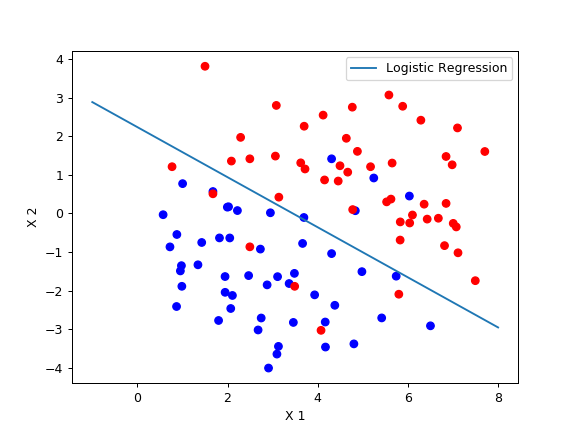

In [12]:
## Q.1 c)

import matplotlib.patches as mpatches

plt.figure()   

colors = ['r' if i==1 else 'b' for i in Y]
scat1 = plt.scatter(X[:,1], X[:,2], color=colors)

red_patch = mpatches.Patch(color='red', label='Y = 1')
blue_patch = mpatches.Patch(color='blue', label='Y = -1')

plt.legend(handles=[red_patch, blue_patch])

x = np.linspace(-1,8,50)

y = -(theta[0] + theta[1]*x)/theta[2]

plt.plot(x,y, label ='Logistic Regression')

plt.legend()

plt.xlabel('X 1')
plt.ylabel('X 2')

plt.show()